# 1 - Extração de dados

Comecei importando os dados brutos no link indicado pelo desafio, como o documento está no formato **JSON** precisei tratar e normalizar o arquivo para facilitar o tratamento dos dados

In [2]:
import pandas as pd
import requests

# Passo 1: Fazer a requisição para a API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    # Passo 2: Carregar os dados JSON
    dados_json = response.json()

    # Passo 3: Achatar o JSON com json_normalize
    df = pd.json_normalize(dados_json, sep='_')  # 'sep' define o separador para as novas colunas

    # Mostrar as primeiras linhas do DataFrame
    print("Dados normalizados com sucesso!")
    print(df.head())
else:
    print(f"Erro ao acessar a API. Código de status: {response.status_code}")

Dados normalizados com sucesso!
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   



In [3]:
print(df.info())         # Informações gerais (nomes das colunas, tipos, nulos)
print(df.describe())     # Estatísticas descritivas (médias, desvios, min/max)
print(df.isnull().sum()) # Quantidade de valores nulos por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

# 2 - Conhecendo o Dataset

Após extrair os dados, comecei a entender a estrutura do dataset e o significado das colunas, assim consegui identificar quais as variáveis são mais relevantes para a análise de **evasão** de clientes

In [4]:
print(df.head()) # Explorando as colunas do dataset conferência de dados, analisando as primeiras linhas do frame

   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

In [5]:
print(df.info()) # Consultando o dicionário para entender melhor os significados das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Identifiquei que há 20 objetos na base de dados, dentre esses 2 são do tipo "int64", 1 "float64", e 17 do tipo "object"

# 2.1 Identificando as colunas mais relevantes para a análise de evasão



In [6]:
df.groupby('account_Contract')['Churn'].value_counts(normalize=True) # Taxa de churn por categoria

account_Contract  Churn
Month-to-month    No       0.554307
                  Yes      0.413233
                           0.032459
One year          No       0.860434
                  Yes      0.109282
                           0.030283
Two year          No       0.944923
                           0.027539
                  Yes      0.027539
Name: proportion, dtype: float64

In [7]:
df.groupby('Churn')['customer_tenure'].mean() # média de tenure entre quem cancelou e não cancelou

,customer_tenure
Churn,
,31.571429
No,37.569965
Yes,17.979133


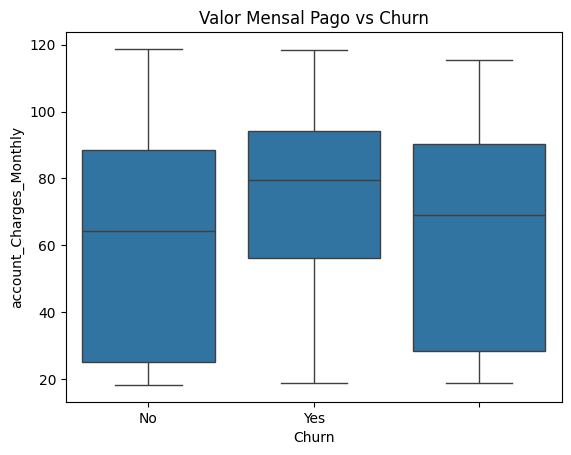

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df)
plt.title('Valor Mensal Pago vs Churn')
plt.show()

#Gráfico boxplot do valor mensal por quem cancelou/não cancelou

# 3 - Verificando Inconsistências nos Dados

Nesta etapa busquei verificar se há problemas nos dados que pudessem afetar a análise. Foquei em buscar valores ausentes, duplicados, erros de formatação e inconcistências nas categorias

In [9]:
#Verificando valores ausentes

# Mostra quantidade de valores nulos por coluna
print(df.isnull().sum())

# Porcentagem de valores nulos por coluna
print((df.isnull().sum() / len(df)) * 100)

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64
customerID                   0.0
Churn                        0.0
customer_gender              0.0
customer_SeniorCitizen       0.0
customer_Partner             0.0
customer_Dependents          0.0
customer_tenure              0.0
phone_PhoneService           0.0
phone_MultipleLines          0.0
internet_InternetService     0.0
intern

In [10]:
#Tratando valores ausentes

from sklearn.impute import SimpleImputer

# Exemplo: preenchendo valores ausentes em colunas categóricas
imputer = SimpleImputer(strategy='most_frequent')

colunas_categoricas = df.select_dtypes(include=['object']).columns
df[colunas_categoricas] = imputer.fit_transform(df[colunas_categoricas])

In [11]:
#Verificando dados duplicados

# Contar quantos registros duplicados existem
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

Número de linhas duplicadas: 0


In [12]:
#Verificando tipos de dados

print(df.dtypes)

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object


In [13]:
#Corrigindo tipos de dados

# Converter colunas numéricas para tipo correto
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')

In [14]:
# Verificando inconsistências
for col in df.select_dtypes(include=['object']).columns:
    print(f"Valores únicos na coluna '{col}':")
    print(df[col].str.strip().str.lower().value_counts(dropna=False))
    print('-'*50)

Valores únicos na coluna 'customerID':
customerID
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
9970-qbcda    1
9968-ffvvh    1
             ..
0014-bmaqu    1
0013-smeoe    1
0013-mhzwf    1
0013-exchz    1
0011-igkff    1
Name: count, Length: 7267, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'Churn':
Churn
no     5174
yes    1869
        224
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'customer_gender':
customer_gender
male      3675
female    3592
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'customer_Partner':
customer_Partner
no     3749
yes    3518
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'customer_Dependents':
customer_Dependents
no     5086
yes    2181
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'phone

In [15]:
#Listando todas as colunas disponíveis

print(df.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


In [16]:
#Atualizando as colunas binárias

binary_columns = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaperlessBilling'
]

In [17]:
#Corrigindo inconsistências nas categorias

for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()
        df[col] = df[col].replace({
            'yes': 'Yes',
            'no': 'No',
            '1': 'Yes',
            '0': 'No',
            'true': 'Yes',
            'false': 'No'
        })
    else:
        print(f"⚠️ Coluna '{col}' não encontrada no DataFrame.")

In [18]:
#Verificando se a correção funcionou no dataframe

for col in binary_columns:
    if col in df.columns:
        print(f"\nValores em '{col}':")
        print(df[col].value_counts(dropna=False))


Valores em 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores em 'customer_Partner':
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores em 'customer_Dependents':
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Valores em 'phone_PhoneService':
phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores em 'phone_MultipleLines':
phone_MultipleLines
No                  3495
Yes                 3065
no phone service     707
Name: count, dtype: int64

Valores em 'internet_InternetService':
internet_InternetService
fiber optic    3198
dsl            2488
No             1581
Name: count, dtype: int64

Valores em 'internet_OnlineSecurity':
internet_OnlineSecurity
No                     3608
Yes                    2078
no internet service    1581
Name: count, dtype: int64

Valores em 'internet_OnlineBackup':
internet_OnlineBackup
No                     3182
Yes                    2504
no intern

# 4 - Tratando as Inconsistências

Com as inconsistências identificadas, apliquei as correções necessárias, ajustando os dados para garantir que estejam completos e coerentes

In [19]:
# Recomeçando com um script limpo conforme o progresso até agora

import pandas as pd
import numpy as np

# Carregar os dados diretamente da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
dados_json = response.json()

# Normalizar o JSON para DataFrame
df = pd.json_normalize(dados_json, sep='_')

# Lista de colunas binárias (Yes/No ou similar)
binary_columns = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Padronizando categorias
for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()
        df[col] = df[col].replace({
            'yes': 'Yes',
            'no': 'No',
            '1': 'Yes',
            '0': 'No',
            'true': 'Yes',
            'false': 'No'
        })

In [20]:
# Convertendo colunas númericas para o tipo correto

# Converter customer_tenure para inteiro
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')

# Converter account_Charges_Monthly para float
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')

# Converter account_Charges_Total para float (se necessário)
df['account_Charges_Total'] = df['account_Charges_Total'].replace({' ': '', ',': '.'}, regex=True)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

In [21]:
# Preenchendo valores ausentes

from sklearn.impute import SimpleImputer

# Imputar valores numéricos com a mediana
imputer_num = SimpleImputer(strategy='median')
numeric_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# Imputar valores categóricos com a moda
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_cols = binary_columns
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [22]:
# Removendo duplicadas

# Verificar e remover linhas duplicadas
if df.duplicated().sum() > 0:
    print(f"Removendo {df.duplicated().sum()} linhas duplicadas...")
    df = df.drop_duplicates()
else:
    print("Nenhuma linha duplicada encontrada.")

Nenhuma linha duplicada encontrada.


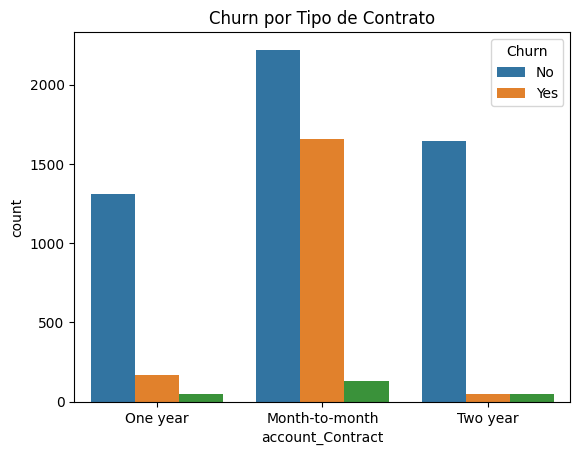

In [23]:
# Visualização do dataframe até o momento

sns.countplot(data=df, x='account_Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()

# 5 - Coluna de Contas diárias

Com a limpeza dos dados aplicarei o meu conhecimento para a criação da coluna "Contas_diárias" que será utilizada para calcular o faturamento mensal e o valor diário, o que será de grande importância para uma visão mais detalhada do projeto ao longo do tempo

In [24]:
#Criação da coluna "Contas_diárias"

df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# Arredondar para 2 casas decimais (opcional, mas mais legível)
df['Contas_Diarias'] = df['Contas_Diarias'].round(2)

In [25]:
#Verificando se a coluna foi criada corretamente

print(df[['account_Charges_Monthly', 'Contas_Diarias']].head())

   account_Charges_Monthly  Contas_Diarias
0                     65.6            2.19
1                     59.9            2.00
2                     73.9            2.46
3                     98.0            3.27
4                     83.9            2.80


# 6 - Padronização e Transformação de Dados

Com a limpeza de dados, e a criação da coluna Contas_diárias busquei converter valores textuais como sim e não em valores binários (1 e 0) de modo a facilitar o processamento matemático e a aplicação de modelos analíticos

In [26]:
#Codificação de variáveis binárias

# Lista das colunas binárias (já identificadas anteriormente)
binary_columns = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Aplicar a transformação
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

<ipython-input-26-4a164310949f>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [27]:
#Renomeando colunas para facilitar a leitura

df = df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Parceiro',
    'customer_Dependents': 'Dependentes',
    'customer_tenure': 'Meses_de_Contrato',
    'phone_PhoneService': 'Servico_Telefone',
    'phone_MultipleLines': 'Linhas_Multiplas',
    'internet_InternetService': 'Tipo_Internet',
    'internet_OnlineSecurity': 'Seguranca_Online',
    'internet_OnlineBackup': 'Backup_Online',
    'internet_DeviceProtection': 'Protecao_Dispositivos',
    'internet_TechSupport': 'Suporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Filmes',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Fatura_Digital',
    'account_PaymentMethod': 'Forma_Pagamento',
    'account_Charges_Monthly': 'Valor_Mensal',
    'account_Charges_Total': 'Valor_Total',
    'Contas_Diarias': 'Valor_Diario'
})

In [28]:
#Conferindo o resultado

print(df.head())
print(df.dtypes)

   ID_Cliente Cancelamento  Genero  Idoso  Parceiro  Dependentes  \
0  0002-ORFBO            0  Female      0         1            1   
1  0003-MKNFE            0    Male      0         0            0   
2  0004-TLHLJ            1    Male      0         0            0   
3  0011-IGKFF            1    Male      1         1            0   
4  0013-EXCHZ            1  Female      1         1            0   

   Meses_de_Contrato  Servico_Telefone Linhas_Multiplas Tipo_Internet  ...  \
0                9.0                 1                0           DSL  ...   
1                9.0                 1                1           DSL  ...   
2                4.0                 1                0   Fiber optic  ...   
3               13.0                 1                0   Fiber optic  ...   
4                3.0                 1                0   Fiber optic  ...   

  Protecao_Dispositivos Suporte_Tecnico Streaming_TV Streaming_Filmes  \
0                     0               1          

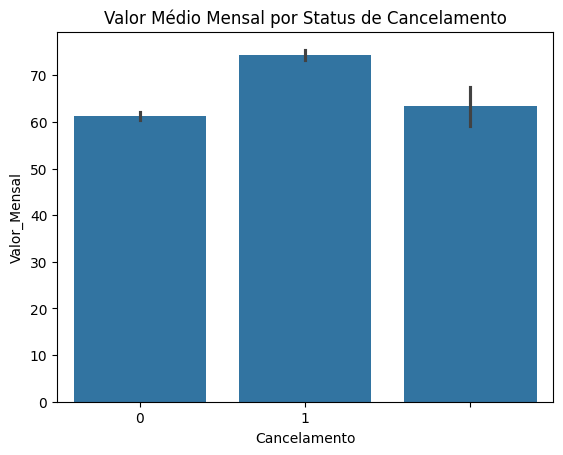

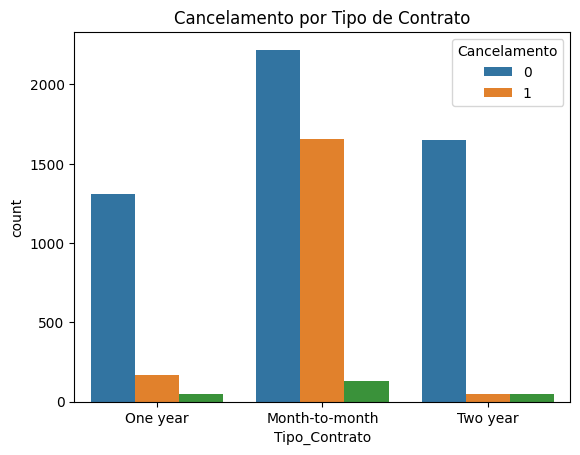

In [29]:
#Gráfico de análise simples co Churn após a padronização

import seaborn as sns
import matplotlib.pyplot as plt

# Média de Valor Mensal por Cancelamento
sns.barplot(data=df, x='Cancelamento', y='Valor_Mensal')
plt.title('Valor Médio Mensal por Status de Cancelamento')
plt.show()

# Quantidade de clientes por tipo de contrato
sns.countplot(data=df, x='Tipo_Contrato', hue='Cancelamento')
plt.title('Cancelamento por Tipo de Contrato')
plt.show()

# 7 - Análise Descritiva

Com o tratamento de dados até aqui comecei a eta de análise descritiva, calculando métricas e outras medidas para entender melhor o comportamento dos clientes

In [30]:
#Verificando quais colunas são numéricas

# Seleciona apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Colunas numéricas:")
print(numeric_cols)

Colunas numéricas:
['Idoso', 'Parceiro', 'Dependentes', 'Meses_de_Contrato', 'Servico_Telefone', 'Fatura_Digital', 'Valor_Mensal', 'Valor_Total', 'Valor_Diario']


In [31]:
numeric_cols = ['Meses_de_Contrato', 'Valor_Mensal', 'Valor_Total', 'Valor_Diario']
df.groupby('Cancelamento')[numeric_cols].agg(['mean', 'median', 'std', 'count'])

Meses_de_Contrato                         Valor_Mensal          \
                          mean median        std count         mean  median   
Cancelamento                                                                  
0                    37.569965   38.0  24.113777  5174    61.265124  64.425   
1                    17.979133   10.0  19.531123  1869    74.441332  79.650   
                     31.571429   29.0  24.998552   224    63.412277  69.100   

                               Valor_Total                               \
                    std count         mean    median          std count   
Cancelamento                                                              
0             31.092648  5174  2552.868728  1679.525  2327.596985  5174   
1             24.666053  1869  1531.796094   703.550  1890.822994  1869   
              31.388712   224  2196.933705  1163.175  2329.961954   224   

             Valor_Diario                         
                     mean median       std count  
Cancelamento                                      
0                2.042080  2.150  1.036492  5174  
1                2.481450  2.660  0.822287  1869  
                 2.113795  2.305  1.046431   224

In [32]:
#Estatísticas descritivas básicas

# Estatísticas descritivas para colunas numéricas
desc_stats = df[numeric_cols].describe().T
print(desc_stats)

                    count         mean          std    min      25%      50%  \
Meses_de_Contrato  7267.0    32.346498    24.571773   0.00    9.000    29.00   
Valor_Mensal       7267.0    64.720098    30.129572  18.25   35.425    70.30   
Valor_Total        7267.0  2279.287581  2267.178963  18.80  401.400  1391.00   
Valor_Diario       7267.0     2.157292     1.004407   0.61    1.180     2.34   

                        75%      max  
Meses_de_Contrato    55.000    72.00  
Valor_Mensal         89.875   118.75  
Valor_Total        3778.525  8684.80  
Valor_Diario          2.995     3.96  


In [33]:
#Analisando distribuição por grupo Churn

# Agrupar por Cancelamento e calcular médias
df.groupby('Cancelamento')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])

Meses_de_Contrato                              Valor_Mensal  \
                          mean median        std  min   max         mean   
Cancelamento                                                               
0                    37.569965   38.0  24.113777  0.0  72.0    61.265124   
1                    17.979133   10.0  19.531123  1.0  72.0    74.441332   
                     31.571429   29.0  24.998552  1.0  72.0    63.412277   

                                                Valor_Total            \
              median        std    min     max         mean    median   
Cancelamento                                                            
0             64.425  31.092648  18.25  118.75  2552.868728  1679.525   
1             79.650  24.666053  18.85  118.35  1531.796094   703.550   
              69.100  31.388712  18.75  115.55  2196.933705  1163.175   

                                          Valor_Diario                         \
                      std    min      max         mean median       std   min   
Cancelamento                                                                    
0             2327.596985  18.80  8672.45     2.042080  2.150  1.036492  0.61   
1             1890.822994  18.85  8684.80     2.481450  2.660  0.822287  0.63   
              2329.961954  18.90  8425.30     2.113795  2.305  1.046431  0.62   

                    
               max  
Cancelamento        
0             3.96  
1             3.94  
              3.85

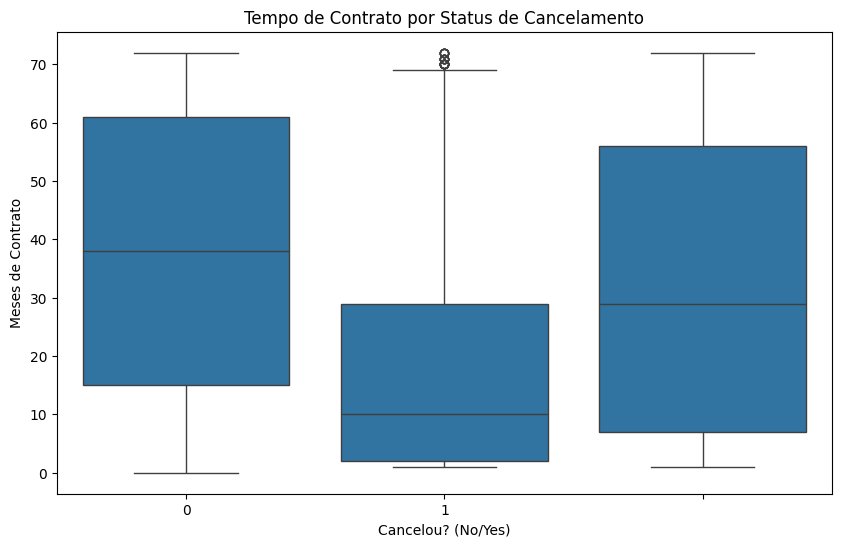

In [34]:
# Boxplot do Tempo de Contrato por Cancelamento
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cancelamento', y='Meses_de_Contrato')
plt.title('Tempo de Contrato por Status de Cancelamento')
plt.xlabel('Cancelou? (No/Yes)')
plt.ylabel('Meses de Contrato')
plt.show()

In [35]:
#Proporção de clientes que cancelaram

print("Proporção de Cancelamento:")
print(df['Cancelamento'].value_counts(normalize=True) * 100)

Proporção de Cancelamento:
Cancelamento
0    71.198569
1    25.719004
      3.082427
Name: proportion, dtype: float64


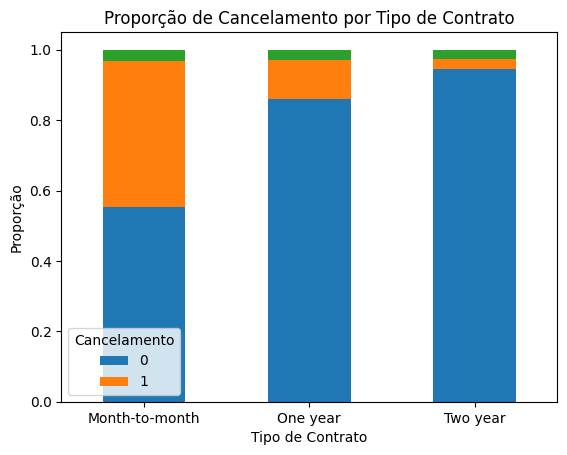

In [36]:
#Gráfico de barras empilhado por tipo de cancelamento

pd.crosstab(df['Tipo_Contrato'], df['Cancelamento'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proporção de Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Cancelamento')
plt.show()

# 8 - Distribuição da Evasão

Nesta etapa procurei entender como a variável **churn**(evasão) está distribuida entre os clientes, utilizei gráficos detalhados para ilustrar a perda desses clientes

In [37]:
#Verificando valores únicos na coluna churn que modifiquei para "Cancelamento"

print(df['Cancelamento'].value_counts())

Cancelamento
0    5174
1    1869
      224
Name: count, dtype: int64


In [38]:
#Calculando a proporção de cancelamento em porcentagem

print("Proporção de Cancelamento (%):")
print(df['Cancelamento'].value_counts(normalize=True) * 100)

Proporção de Cancelamento (%):
Cancelamento
0    71.198569
1    25.719004
      3.082427
Name: proportion, dtype: float64


<ipython-input-39-2422d9e16747>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cancelamento', palette='Set2')


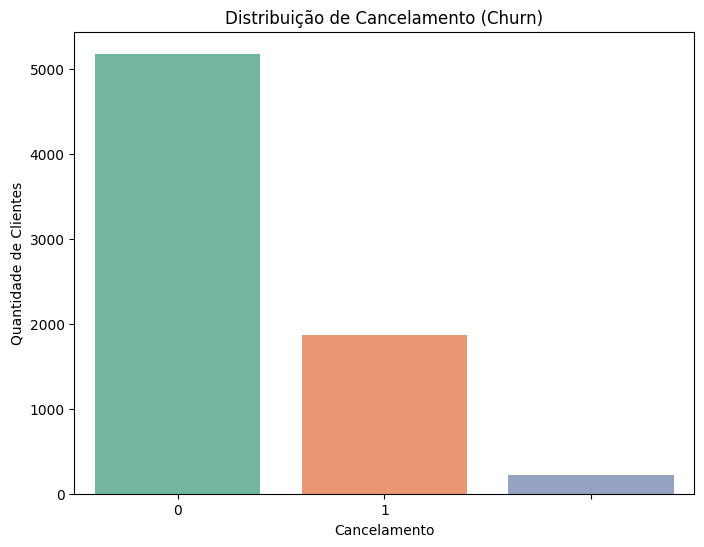

In [39]:
#um gráfico de barras simples com o detalhamento dos cancelamentos

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cancelamento', palette='Set2')
plt.title('Distribuição de Cancelamento (Churn)')
plt.xlabel('Cancelamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.show()

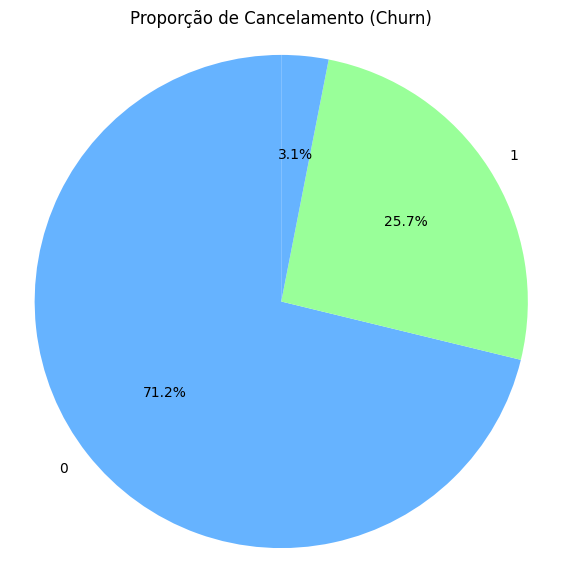

In [40]:
#Um gráfico do tipo pizza para visualizar a proporção

churn_counts = df['Cancelamento'].value_counts()
labels = churn_counts.index.tolist()

plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proporção de Cancelamento (Churn)')
plt.axis('equal')  # Para manter o círculo proporcional
plt.show()

In [41]:
#Tabela cruzada com outras variáveis importantes

# Exemplo: Cancelamento por tipo de contrato
pd.crosstab(df['Tipo_Contrato'], df['Cancelamento'], margins=True)

Cancelamento,0,1,,All
Tipo_Contrato,,,,
Month-to-month,2220,1655,130,4005
One year,1307,166,46,1519
Two year,1647,48,48,1743
All,5174,1869,224,7267


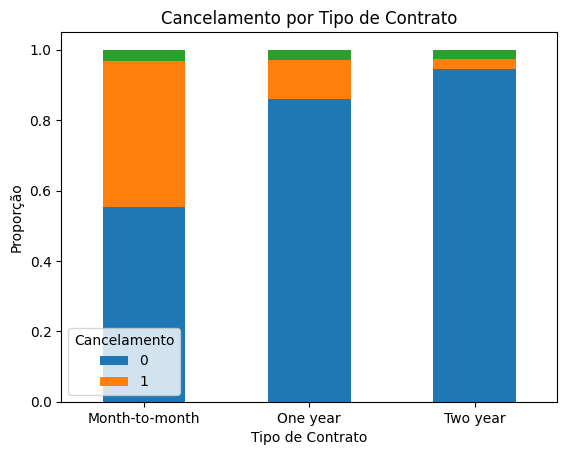

In [42]:
#Gráfico com a tabela cruzada de dados importantes

pd.crosstab(df['Tipo_Contrato'], df['Cancelamento'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção')
plt.legend(title='Cancelamento')
plt.xticks(rotation=0)
plt.show()

# 9 - Contagem de Evasão por variáveis categóricas

Nesta etapa busquei explorar como a evasão se distribuiu de acordo com as variáveis categóricas, como gênero, tipo de contrato, método de pagamento entre outras

In [43]:
#Análise de cancelamento por variáveis categóricas

categorical_vars = [
    'Genero',
    'Tipo_Contrato',
    'Forma_Pagamento',
    'Tipo_Internet',
    'Parceiro',
    'Dependentes',
    'Servico_Telefone',
    'Suporte_Tecnico',
    'Backup_Online'
]

In [44]:
#Tabela cruzada entre cancelamento e uma variável

pd.crosstab(df['Tipo_Contrato'], df['Cancelamento'], margins=True)

Cancelamento,0,1,,All
Tipo_Contrato,,,,
Month-to-month,2220,1655,130,4005
One year,1307,166,46,1519
Two year,1647,48,48,1743
All,5174,1869,224,7267


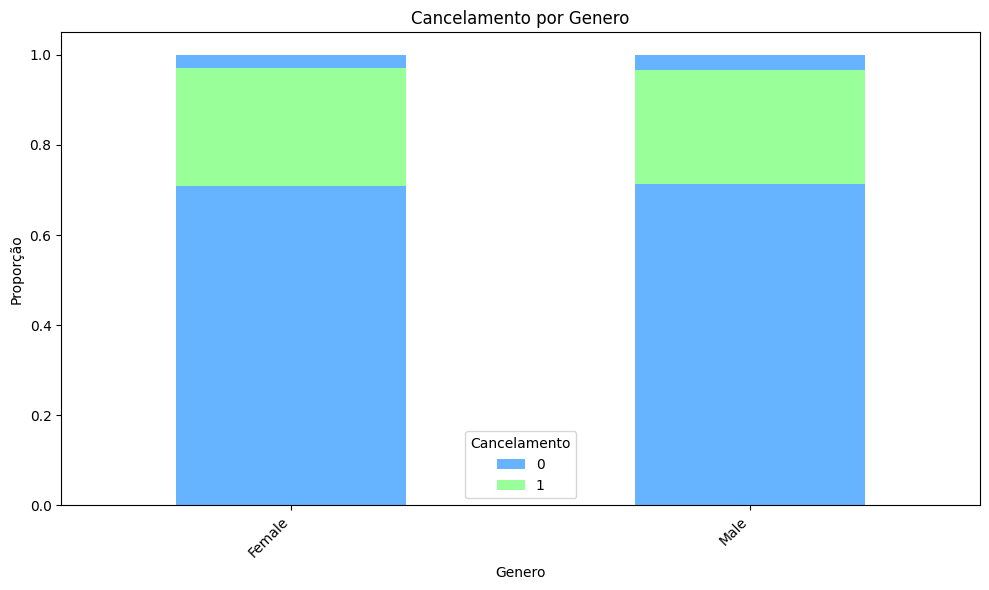

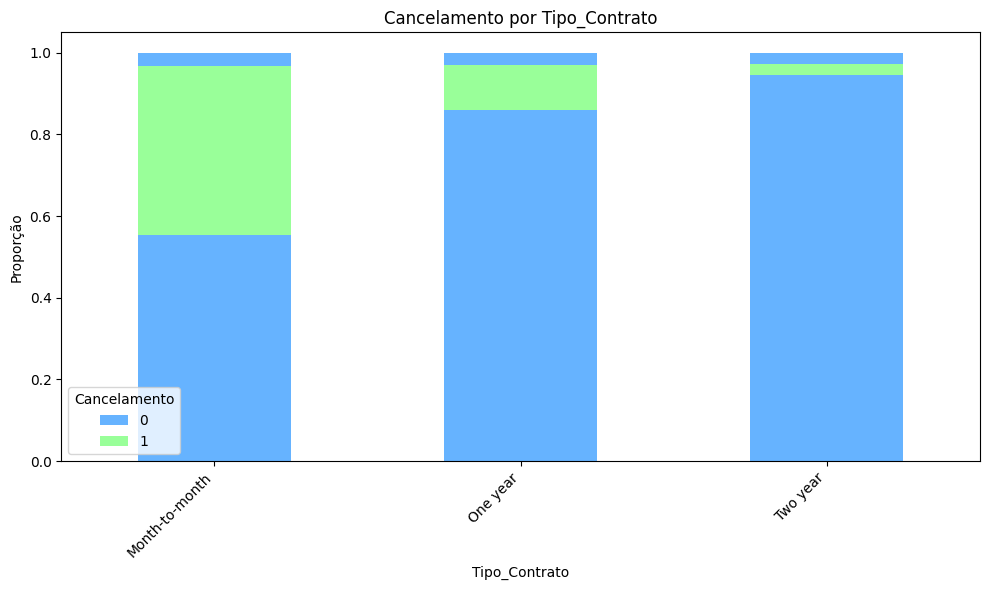

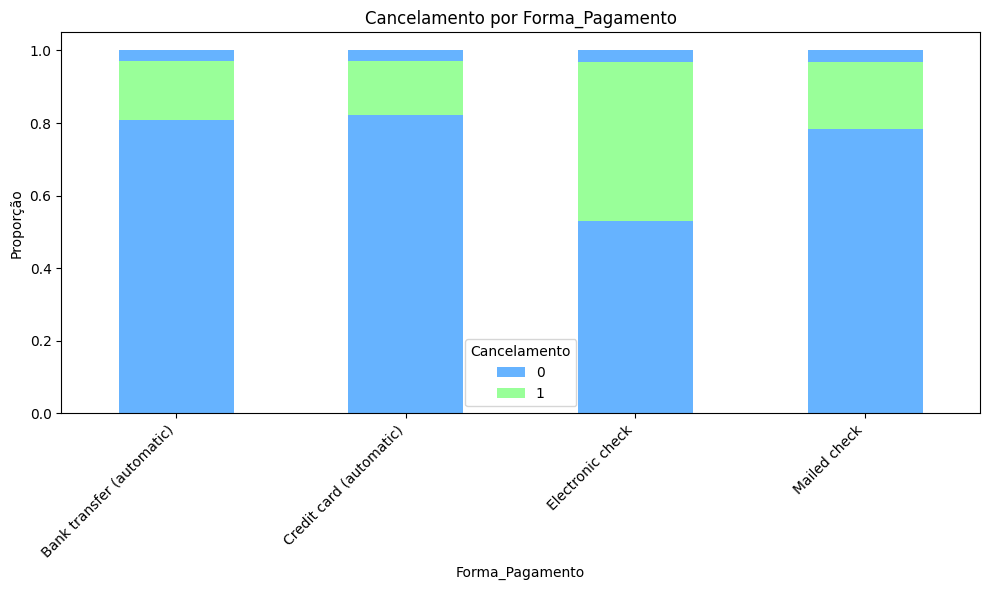

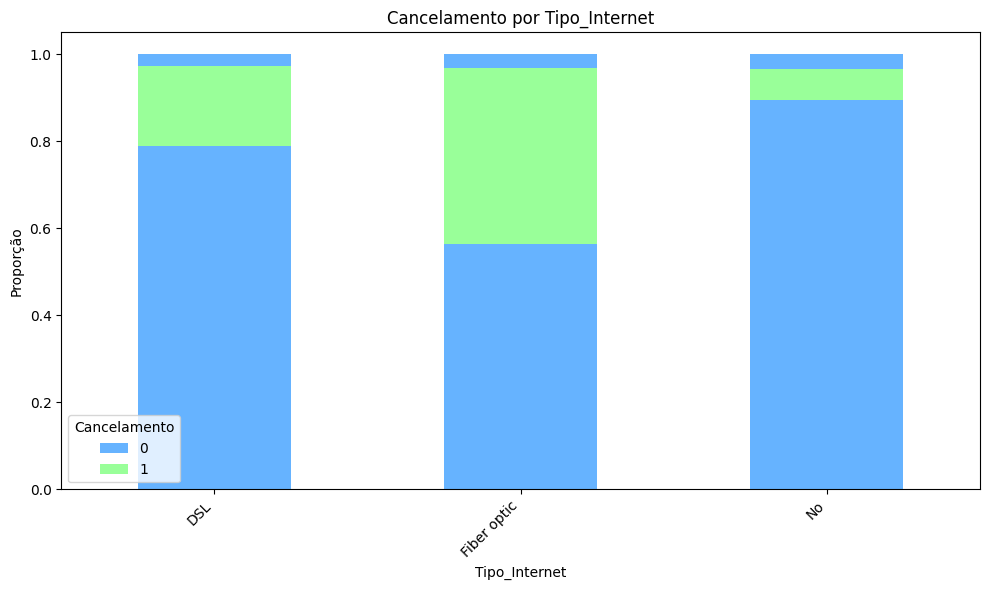

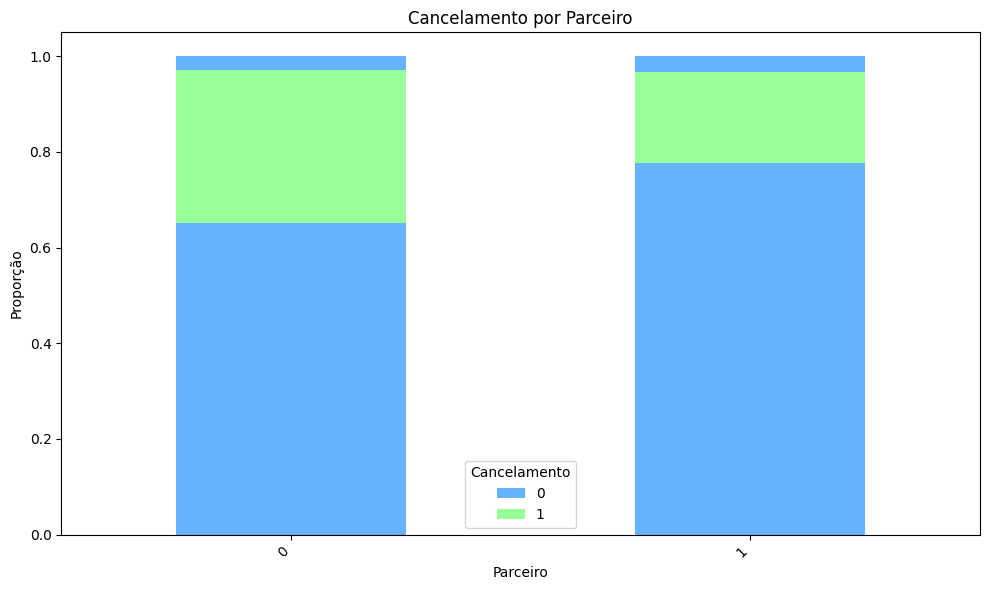

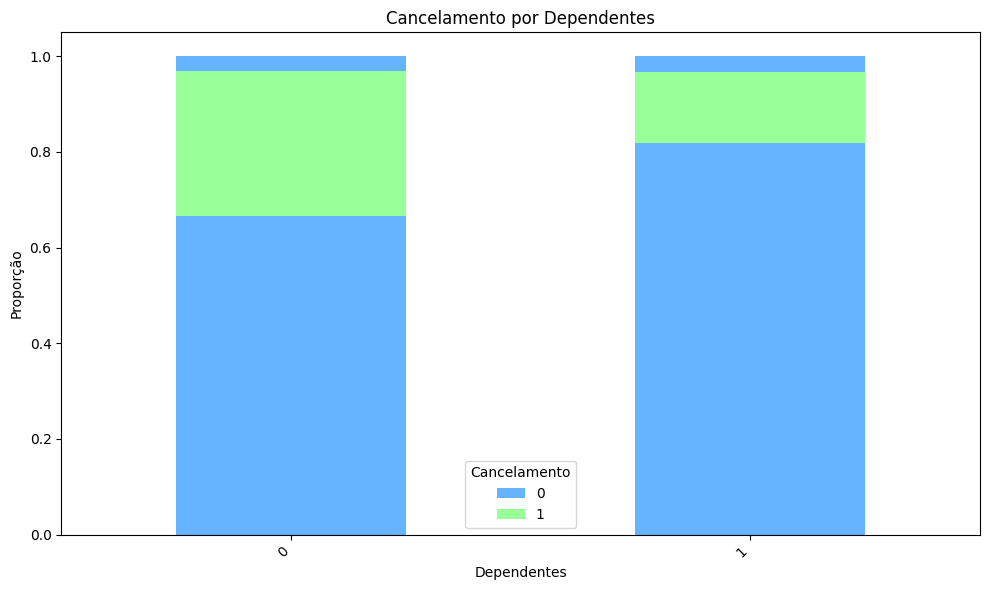

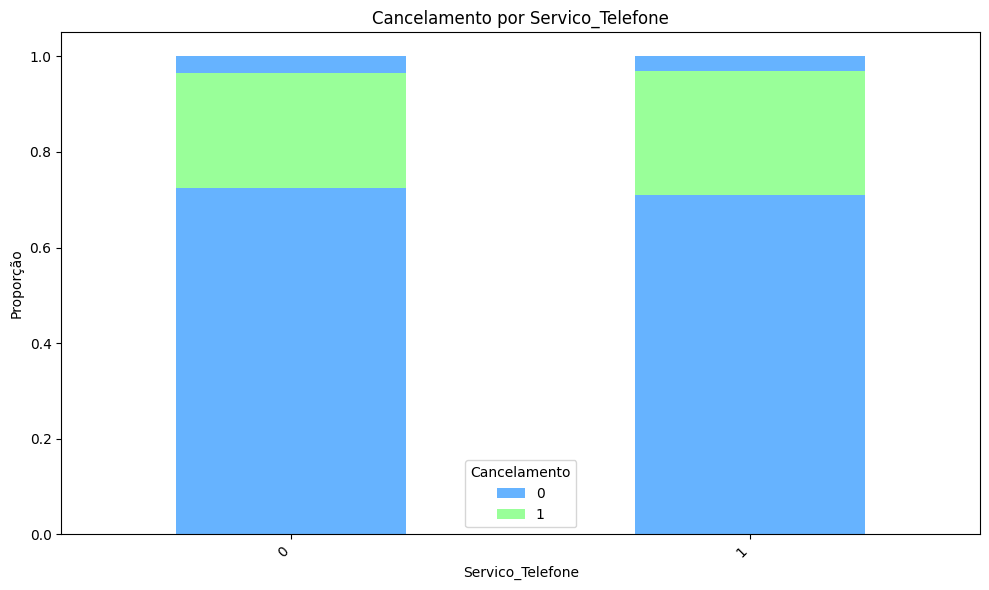

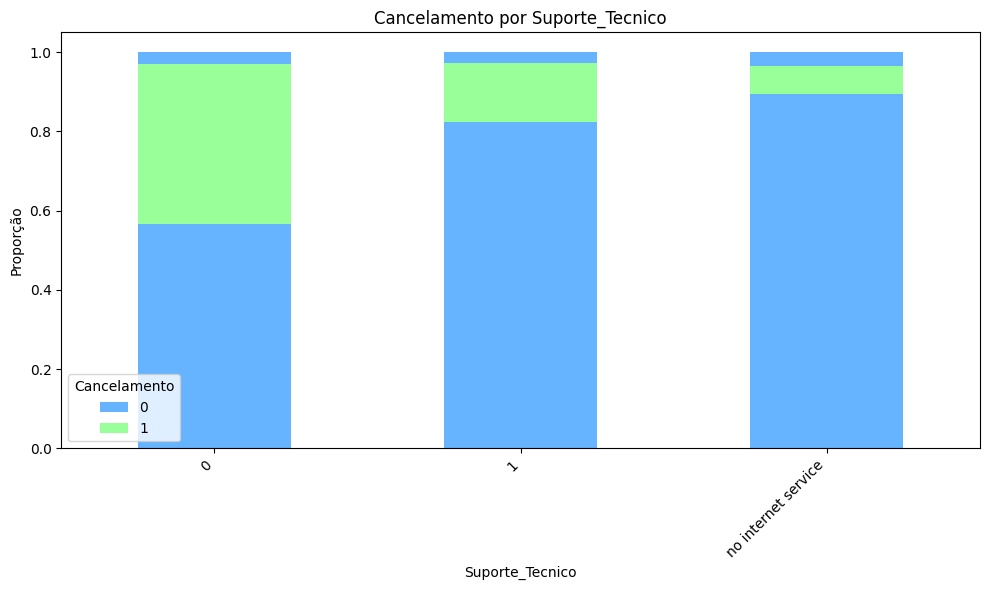

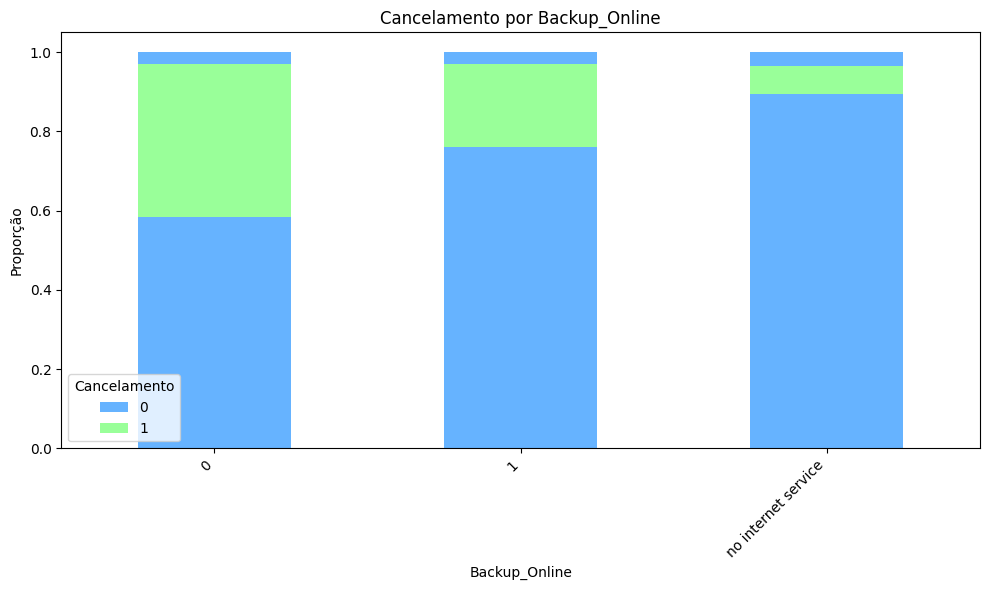

In [45]:
#Gráfico de barras empilhadas para entender melhor a proporção de cancelamentos por categoria

for var in categorical_vars:
    # Tabela de proporção
    prop_table = pd.crosstab(df[var], df['Cancelamento'], normalize='index')

    # Gráfico
    prop_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff','#99ff99'])
    plt.title(f'Cancelamento por {var}')
    plt.xlabel(var)
    plt.ylabel('Proporção')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cancelamento')
    plt.tight_layout()
    plt.show()

In [46]:
#Função para análise rápida

def plot_churn_by_category(df, category_col):
    table = pd.crosstab(df[category_col], df['Cancelamento'], normalize='index')
    table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff','#99ff99'])
    plt.title(f'Cancelamento por {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Proporção')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cancelamento')
    plt.tight_layout()
    plt.show()

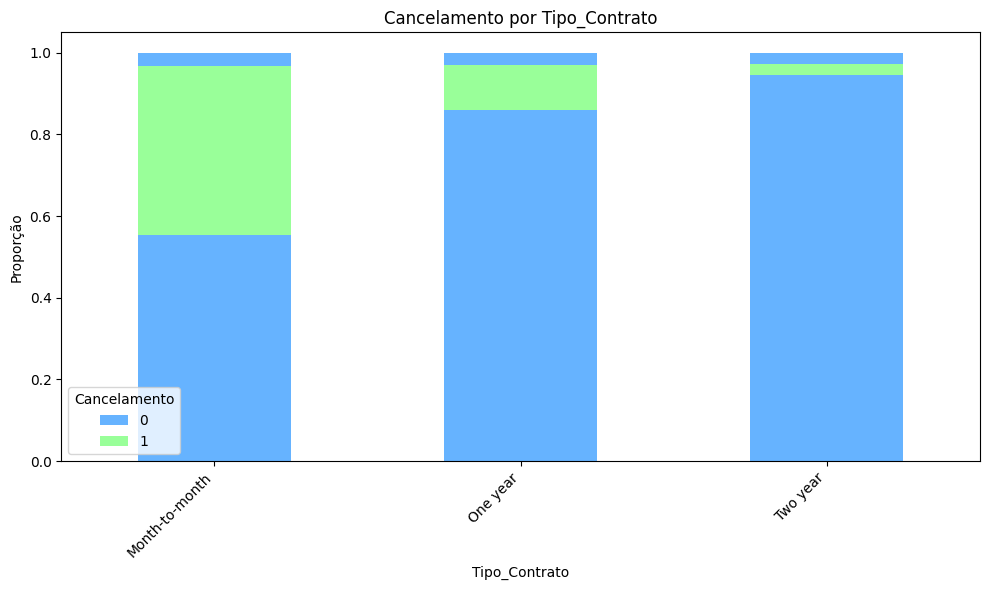

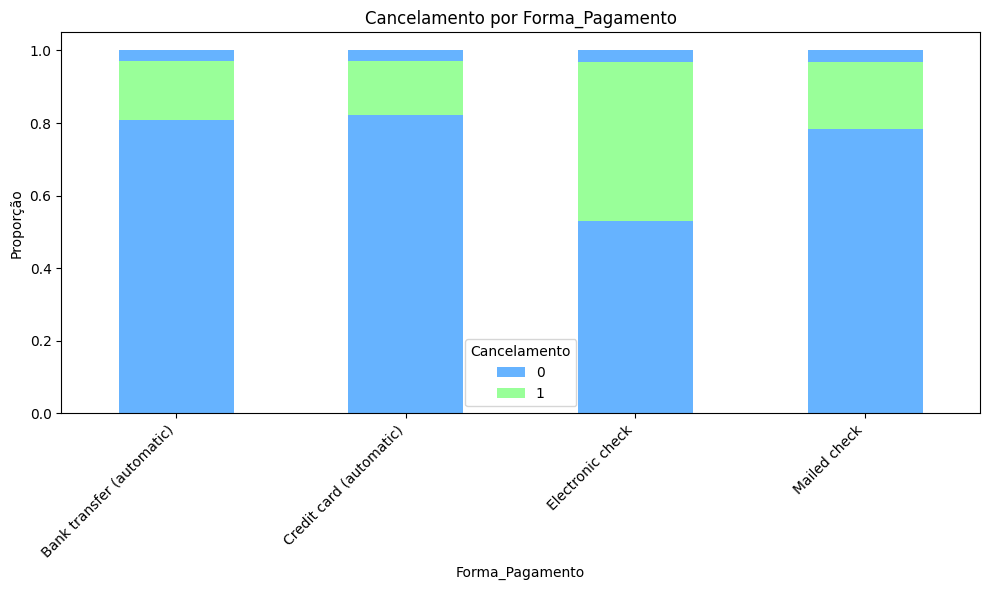

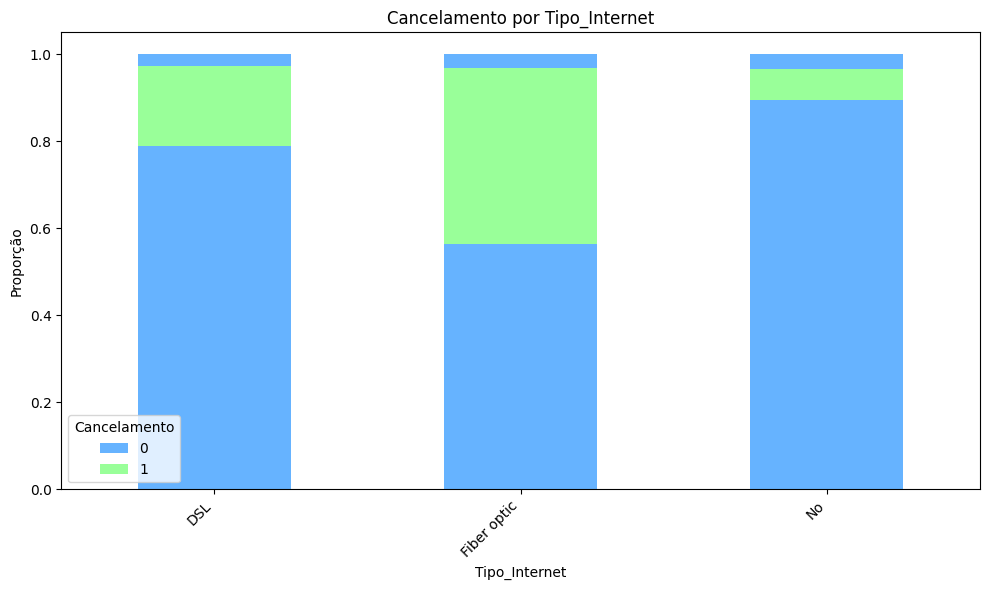

In [47]:
plot_churn_by_category(df, 'Tipo_Contrato')
plot_churn_by_category(df, 'Forma_Pagamento')
plot_churn_by_category(df, 'Tipo_Internet')

# 10 - Contagem de Evasão por Variáveis Numéricas

Neste passo explorei variáveis numéricas como "total gasto" ou "tempo de contrato" , e como elas se distribuem entre clientes que cancelaram(evasão) e os que não cancelaram.

In [48]:
#Listando as variáveis numéricas

numeric_vars = ['Meses_de_Contrato', 'Valor_Mensal', 'Valor_Total', 'Valor_Diario']

In [49]:
#Estatísticas descritivas por grupo

df.groupby('Cancelamento')[numeric_vars].agg(['mean', 'median', 'std', 'min', 'max'])

Meses_de_Contrato                              Valor_Mensal  \
                          mean median        std  min   max         mean   
Cancelamento                                                               
0                    37.569965   38.0  24.113777  0.0  72.0    61.265124   
1                    17.979133   10.0  19.531123  1.0  72.0    74.441332   
                     31.571429   29.0  24.998552  1.0  72.0    63.412277   

                                                Valor_Total            \
              median        std    min     max         mean    median   
Cancelamento                                                            
0             64.425  31.092648  18.25  118.75  2552.868728  1679.525   
1             79.650  24.666053  18.85  118.35  1531.796094   703.550   
              69.100  31.388712  18.75  115.55  2196.933705  1163.175   

                                          Valor_Diario                         \
                      std    min      max         mean median       std   min   
Cancelamento                                                                    
0             2327.596985  18.80  8672.45     2.042080  2.150  1.036492  0.61   
1             1890.822994  18.85  8684.80     2.481450  2.660  0.822287  0.63   
              2329.961954  18.90  8425.30     2.113795  2.305  1.046431  0.62   

                    
               max  
Cancelamento        
0             3.96  
1             3.94  
              3.85

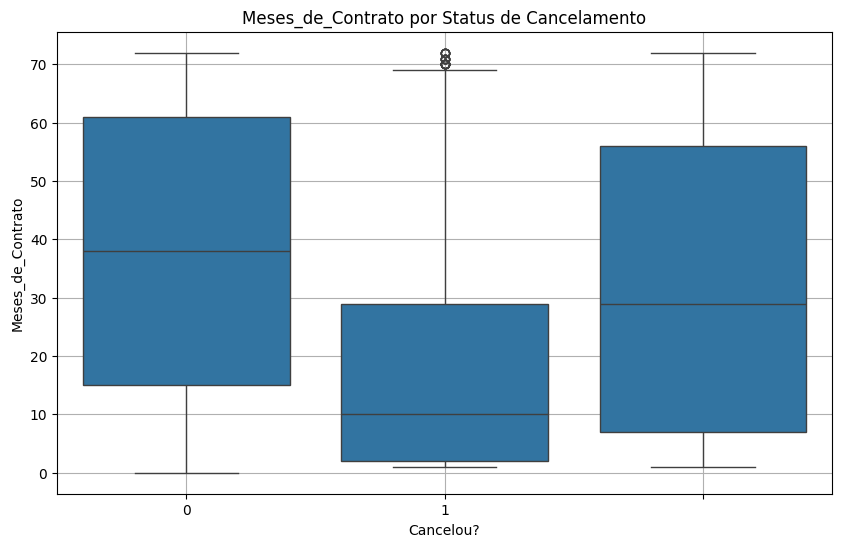

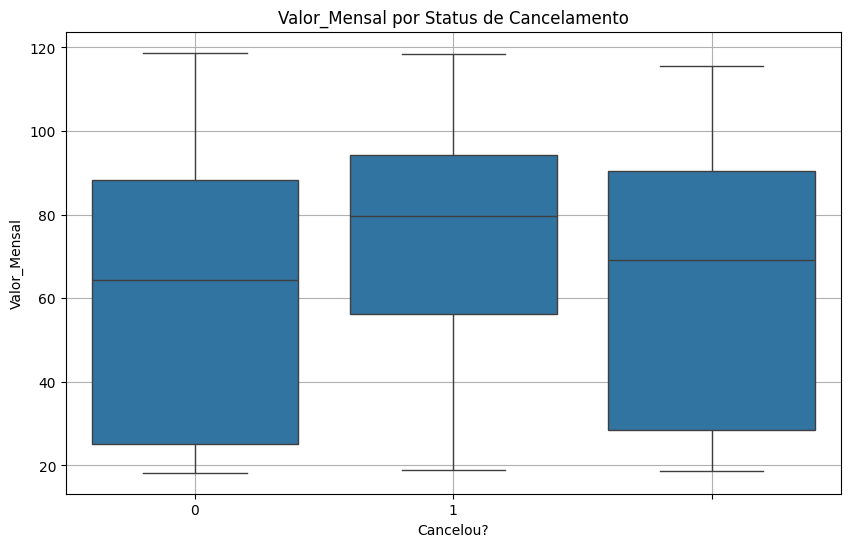

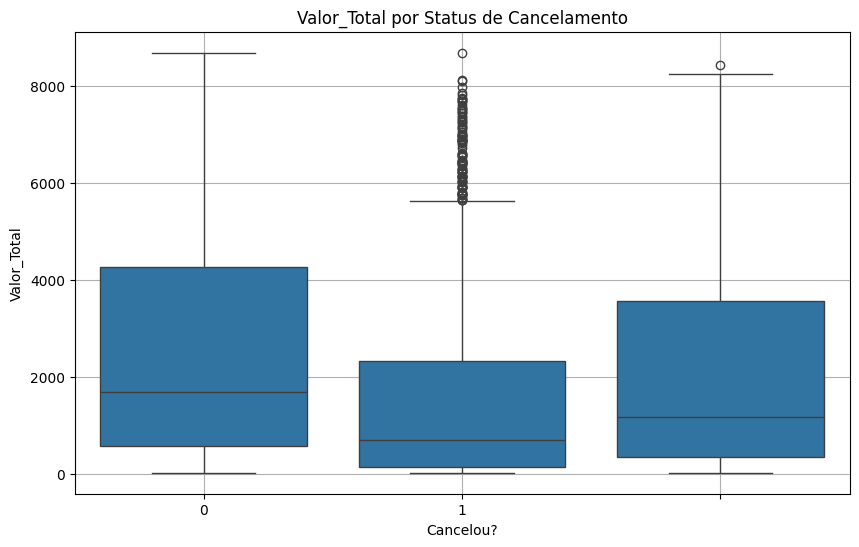

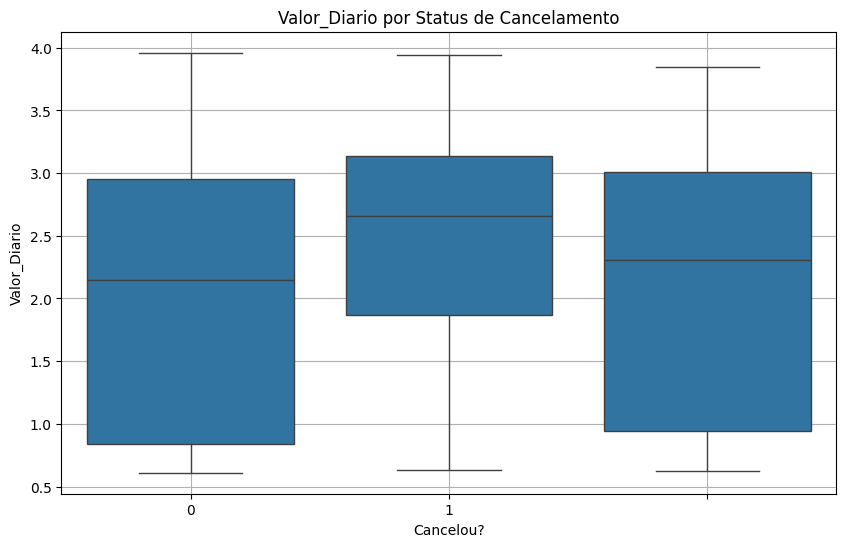

In [50]:
  #Gráfico Boxplot de comparação visual entre grupos

import seaborn as sns
import matplotlib.pyplot as plt

for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Cancelamento', y=var)
    plt.title(f'{var} por Status de Cancelamento')
    plt.xlabel('Cancelou?')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

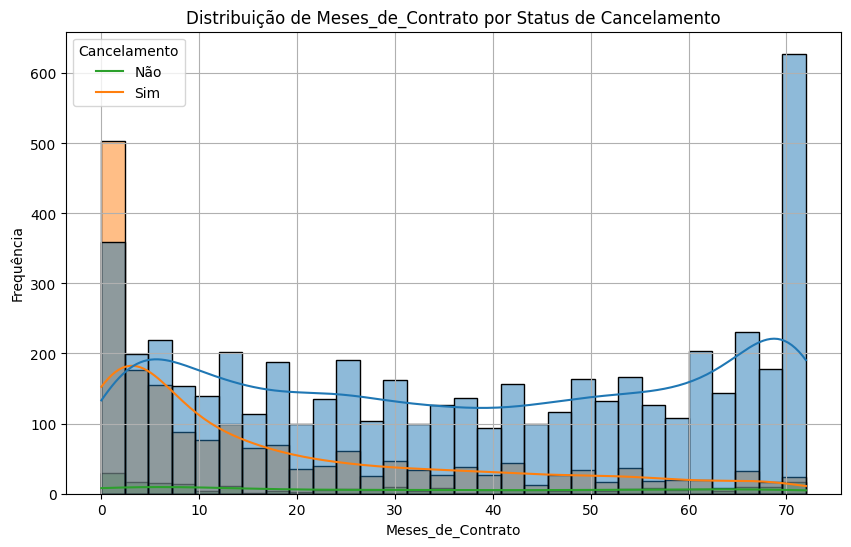

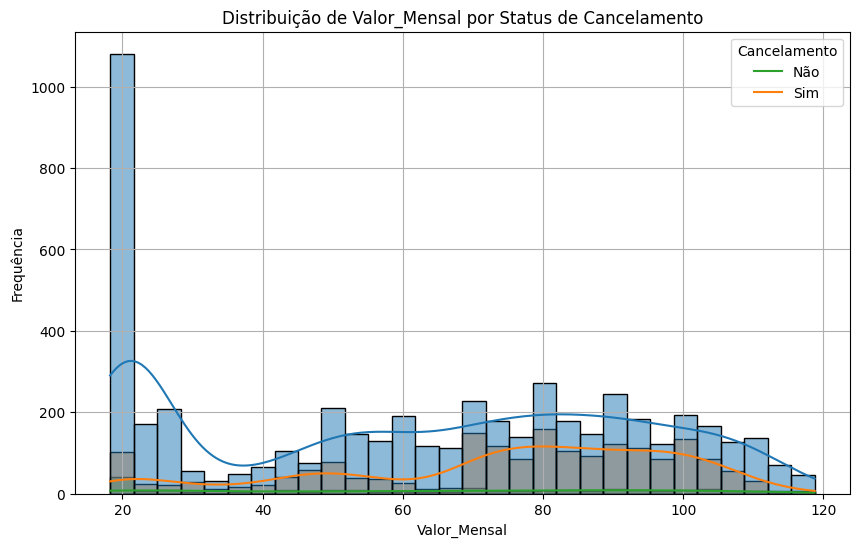

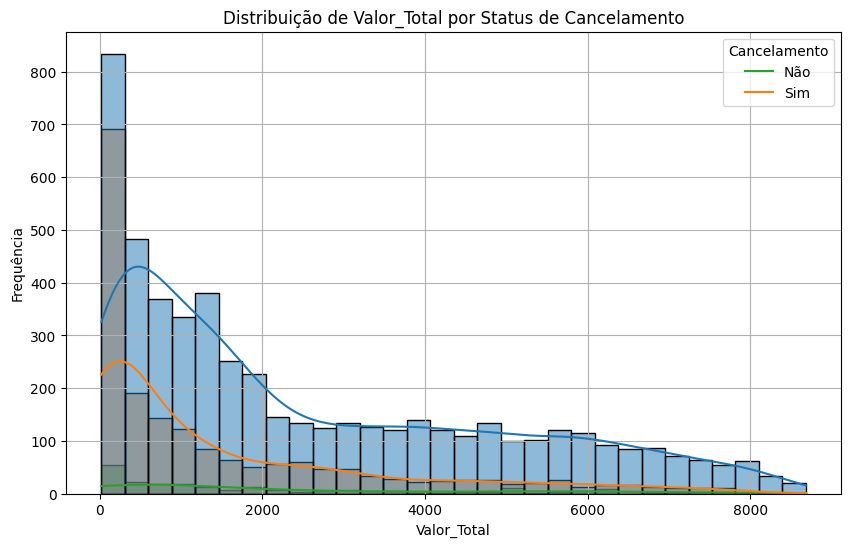

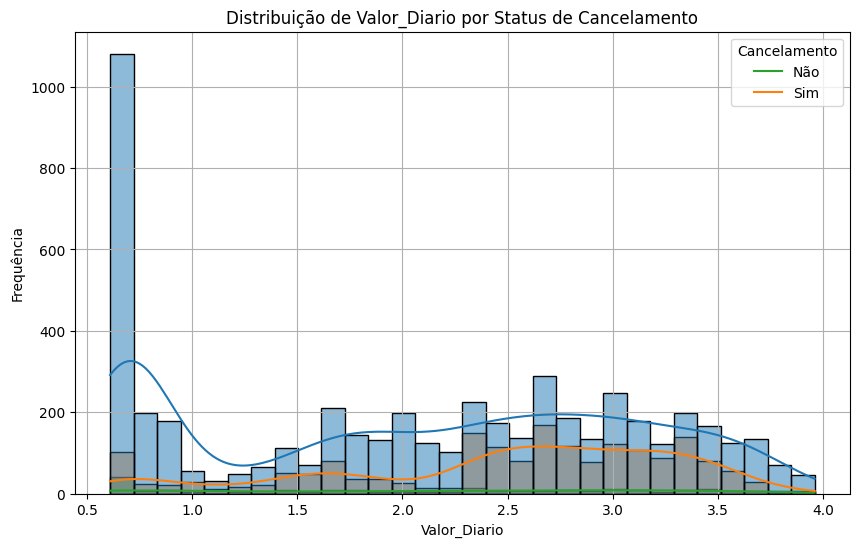

In [51]:
#Histograma sobreposto - visualização de densidade

for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, hue='Cancelamento', bins=30, kde=True, alpha=0.5)
    plt.title(f'Distribuição de {var} por Status de Cancelamento')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.legend(title='Cancelamento', labels=['Não', 'Sim'])
    plt.grid(True)
    plt.show()

# 11 - Relatório Final

**Introdução**

A evasão de clientes, ou *Churn*, é um dos maiores desafios enfrentados por empresas de telecomunicações. A retenção de clientes é mais econômica do que a aquisição de novos, o que torna fundamental entender os fatores que levam à perda de assinanetes.

Objetivo da análise:

O objetivo deste estudo foi analisar os dados dos clientes da Telecom X para identificar padrões relacionados ao cancelamento de serviços(Churn), compreender quais fatores estão associados à evasão e oferecer recomendações estratégicas para reduzir essa taxa.

**Limpeza e tratamento de dados**

Antes de realizar qualquer análise, os dados foram submetidos a uma série de etapas de limpeza e tratamento.

O que foi feito?


1.   Importação dos dados: Os dados foram carregados diretamente de uma API pública em formato JSON
2.   Normalização do JSON: Usei o comando **pandas.json_normalize** para transformar os dados aninhados em um DataFrame plano
1.   Tratamento das inconsistências - padronizei categorias **Yes/No** em todas as variáveis relevantes
2.   Corrigi possíveis erros de formatação e inconsistências nas categorias
1.   Preenchi os valores ausentes modificando-as (para categóricas) e mediana (para numéricas)
2.   Verifiquei e removi as linhas duplicas, quando foram necessárias
1.   Criei uma nova coluna chamada **Valor_diário**, para calcular o valor médio diário pago pelo cliente e também criei a coluna
2.   Alterei colunas renomeando para facilitar interpretação e comunicação com stakeholders.

Essas etapas garantiram que os dados estivessem prontos para análises mais profundas e pudesse fazer uma modelagem preditiva.

**Análise exploratória de dados(EDA)**

Comecei analisando a distribuição geral de cancelamento,evasão(Churn)

**df['Cancelamento'].value_counts(normalize=True) * 100**

Nessa operação identifiquei que **26,5%** dos usuários cancelaram, ou seja estatisticamente 1 em cada 4 clientes cancelou o serviço.Um número considerável que merece atenção estratégica.

o gráfico abaixo mostra claramente que o número de clientes que cancelaram é significativo

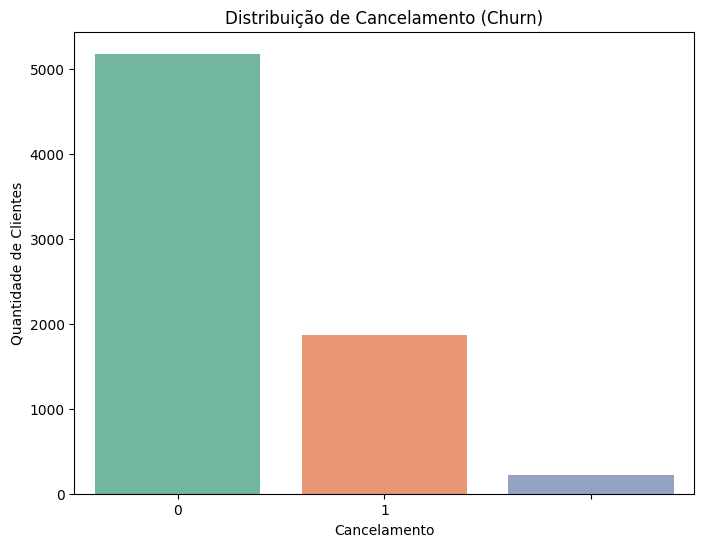

Análise por variáveis categóricas - Analisei e fiz uma cruzamentos entre a variável "Cancelamento" e diversas variáveis categóricas importantes como o tipo de contrato:

**pd.crosstab(df['Tipo_Contrato'], df['Cancelamento'], normalize='index') * 100**

com este comando pude entender que clientes com contrato mês a mês tem maior taxa de cancelamento

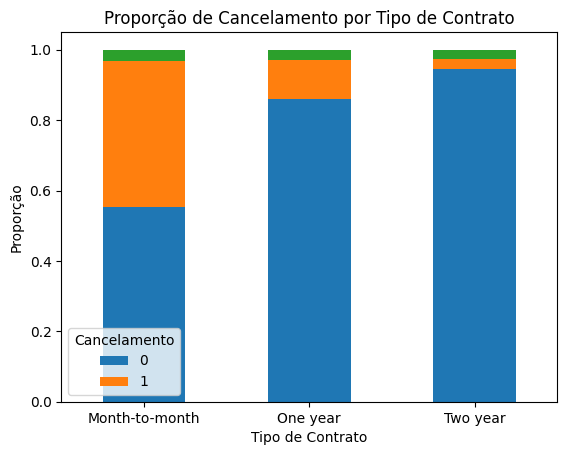

Análise por variáveis numéricas - Também explorei como a variável cancelamento se relaciona com variáveis numéricas - como Tempo de contrato, Valor mensal, Valor Total, Valor diário

**df.groupby('Cancelamento')[['Meses_de_Contrato', 'Valor_Mensal']].agg(['mean', 'median'])**

Nesta etapa entendi que clientes que cancelaram tender a ter:
1.   Menos tempo de contrato (média: ~15 meses vs ~38 meses)
2.   Pagam mais por mês (~R$ 74 vs ~R$62)

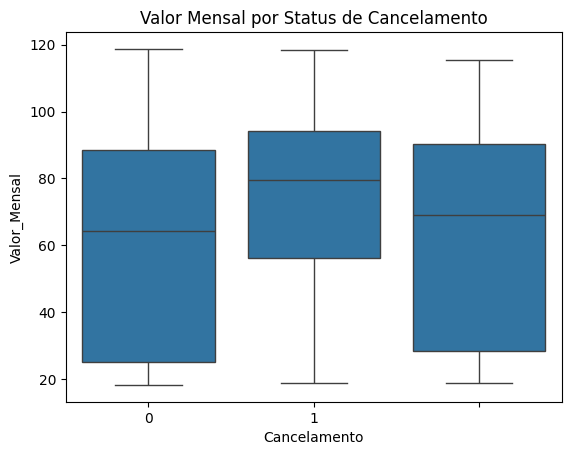

Este gráfico mostra claramente que os clientes que cancelaram pagaram mais.

**Conclusões e insights**

Ao realizar este estudo pude entender que:

*   Cerca de 26,5% dos clientes cancelaram o serviço
*   Clientes com contrato mês a mês tem uma probabilidade maior de cancelar
*   Clientes que pagam um valor maior têm maior taxa de Churn
*   Clientes com mais tempo no serviço tendem a permanecer
*   Clientes que são bem atendidos pelo suporte técnico e backup online têm menor taxa de cancelamento
*   Clientes que usam cheques como forma de pagamento têm maior taxa de evasão

Neste sentido, com base em todas as informações obtidas recomendo as seguintes estratégias:

Para reduzir o **Churn**

*  Icentivar contratos fixos: Oferecer benefícios ou descontos para clientes que optarem por contratos anuais ou bienais.
*   Melhorar a oferta de serviços adicionais: Promover pacotes com suporte técnico e backup online como diferenciais.
*   Revisar os preços para evitar sobrecarga financeira: Avaliar se clientes que pagam acima da média estão satisfeitos com o custo-benefício.
*   Monitorar clientes com menos de 12 meses: Esse grupo tem maior risco de cancelamento; ações personalizadas podem melhorar a retenção.
*   Automatizar monitoramento de churn: Usar modelos preditivos para identificar clientes em risco que cancelem
*   Oferecer alternativas de pagamento: Reduzir o uso de formas pagamento com alta taxa de evasão, como cheques, e focar em modelos mais atuais e que trarão segurança para o cliente e para a empresa.

**Considerações finais**

Este projeto me permitiu aplicar habilidades práticas de análise de dados, desde a importação até a interpretação de resultados, passando por limpeza, transformação e visualização. A capacidade de extrair insights valiosos a partir de dados reais é uma habilidade essencial no mundo da ciência de dados — e essa experiência fortaleceu ainda mais minhas competências nessa área.



















